<a href="https://colab.research.google.com/github/sathamhussain7/ML-algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic_Regression**

**import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

In [ ]:
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [ ]:
df.shape

(40, 4)

In [ ]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df=df.drop_duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [ ]:
df.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

In [ ]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [ ]:
feature=['gmat',	'gpa',	'work_experience',	'admitted']
for i in feature:
 iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
 upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
 lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)

 print('feature:',i)
 print('iqr :',iqr)
 print('upper_threshold : ',upper_threshold)
 print('lower_threshold :',lower_threshold)
 
 if upper_threshold > df[i].max():
  print('No outlier in upper_threshold ')
 else:
  print('outlier in upper_threshold')
 if lower_threshold< df[i].min():
   print('No outlier in lower_threshold ')
 else:
  print('outlier in lower_threshold')
 print()

feature: gmat
iqr : 82.5
upper_threshold :  813.75
lower_threshold : 483.75
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: gpa
iqr : 1.0
upper_threshold :  5.2
lower_threshold : 1.2000000000000002
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: work_experience
iqr : 3.0
upper_threshold :  9.5
lower_threshold : -2.5
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: admitted
iqr : 1.0
upper_threshold :  2.5
lower_threshold : -1.5
No outlier in upper_threshold 
No outlier in lower_threshold 



**EDA**

In [ ]:
import seaborn as sns

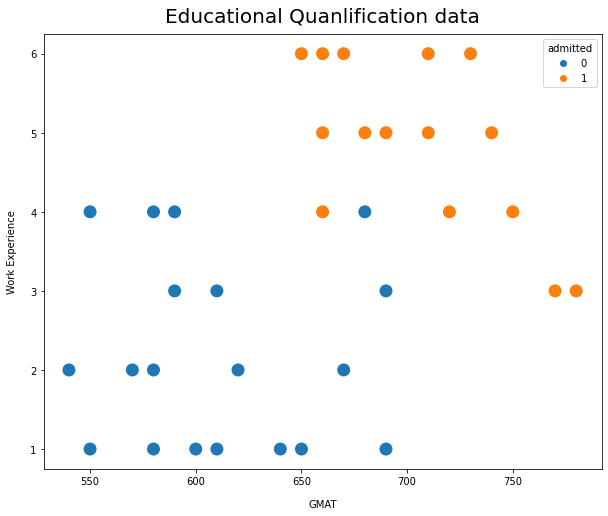

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='work_experience', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

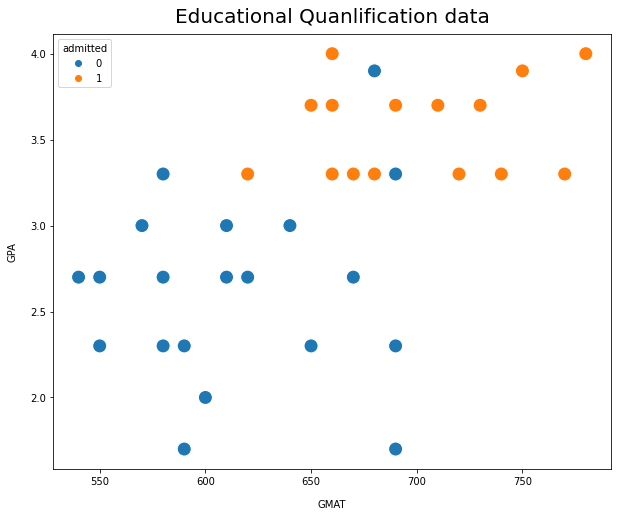

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='gpa', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("GPA", labelpad=13)
ax = plt.gca()

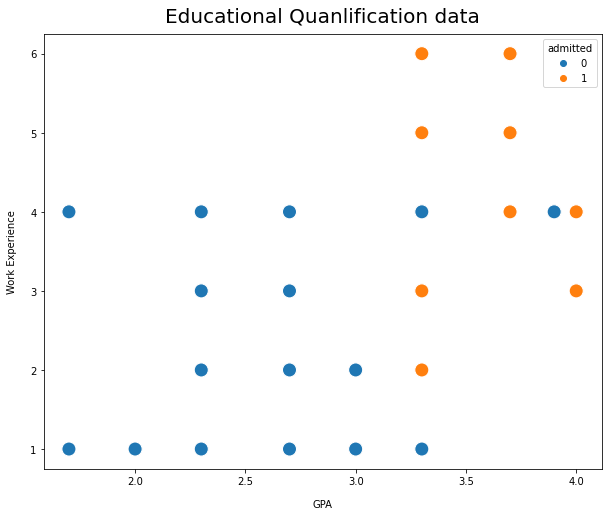

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gpa', y='work_experience', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GPA", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

**Split the data**

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['gmat','gpa','work_experience']].values
y=df['admitted'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
logistic_regression.predict([[733,4.5,7]])

array([1])

In [ ]:
logistic_regression.predict_proba([[700,3.2,5]])

array([[0., 1.]])

In [ ]:
logistic_regression.predict_proba(X_test)

array([[0.10633841, 0.89366159],
       [0.92466045, 0.07533955],
       [0.20815751, 0.79184249],
       [0.96848819, 0.03151181],
       [0.17599692, 0.82400308],
       [0.06371613, 0.93628387],
       [0.93749805, 0.06250195],
       [0.43014857, 0.56985143]])

In [ ]:
logistic_regression.intercept_ #c

array([-0.36064363])

In [ ]:
logistic_regression.coef_

array([[0.83192829, 0.98650182, 1.05739633]])

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score,roc_auc_score

In [ ]:
accuracy_score(y_test,y_pred)

0.75

In [ ]:
print('accuracy:',logistic_regression.score(X_test,y_test))

accuracy: 0.75


In [ ]:
confusion_matrix(y_test,y_pred)

array([[3, 1],
       [1, 3]])

In [ ]:
f1_score(y_test,y_pred)

0.75

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


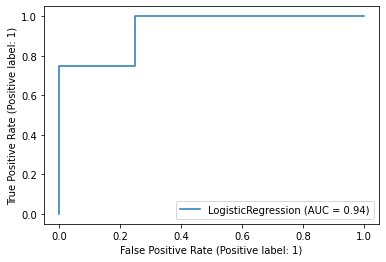

In [ ]:
plot_roc_curve(logistic_regression, X_test, y_test)